# Exploring a dataset project
## Dataframe selected for the analysis: [IMBD Movies](https://www.kaggle.com/tmdb/tmdb-movie-metadata)<h4>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda1">Exploratory Data Analysis: Question 1</a></li>
<li><a href="#eda2">Exploratory Data Analysis: Question 2</a></li>
<li><a href="#eda3">Exploratory Data Analysis: Question 3</a></li>
<li><a href="#eda4">Exploratory Data Analysis: Question 4</a></li> 
<li><a href="#conc">Conclusion</a></li> 
</ul>

<a id='intro'></a>
## Introduction

The IMBD Movies dataframe selected includes more than 10000 movie information gathered directly from the IMBD page. The data includes information related to title, year of release, cast, director... As well as ratings such as popularity and vote average. It also includes financial data such as budget and revenue.

## Questions to be answered in the analysis

1. Which genres are most popular from year to year?
   - 1.1 Is there a general trend from both popularity and vote average? Let's first display the data for all movies regardless of the genre, to check if there has been a clear trend for all the movies
   - 1.2 Which are the most popular genres on average for the whole distribution? And what about these that have higher vote averages? Among those which have stand out in any particular moment of time, if any

2. Who are the directors that are getting higher profits for their movies? Are these directors among the ones with higher vote averages? Is there a correlation between these two variables?
3. Which are the movies that are most profitable? Is there a genre specially profitable?
4. Which the main features that make a particular movie very profitable?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

When importing the file for the first time we ensure that we are parsing the date fields correctly

In [2]:
movies = pd.read_csv('tmdb-movies.csv', parse_dates=['release_date','release_year'])
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015-01-01,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015-01-01,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015-01-01,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015-01-01,1.747999e+08,1.385749e+09


Using the info method we can get an initial idea of how our dataframe look like and if we already have to make any amend to the existing fields, we'll proceed with all the necessary changes in the following section

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

<a id='wrangling'></a>
## Data wrangling
Doing the necessary checks to ensure that all the data used is solid and there are no errors that could alter our analysis. First we check if there are duplicate values and proceed to drop them.

In [4]:
movies.duplicated().sum()

1

In [5]:
movies.drop_duplicates(inplace=True)

After droping the duplicate value we found we check again if there no more duplicates

In [6]:
movies.duplicated().sum()

0

At this point using the describe method to find out if there are incorrect values, such as 0, in our numeric field that therefore could affect future analysis

In [7]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


After finding out that our numeric columns have a lot of values set up to 0 I want to remove all of these so I don't get errors in future analysis.
I will remove any movie that contains a 0 in all of budget and revenue fields, as well in runtime

In [8]:
movies = movies.query("budget != 0 and revenue != 0 and budget_adj != 0 and revenue_adj != 0 and runtime != 0")

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   imdb_id               3854 non-null   object        
 2   popularity            3854 non-null   float64       
 3   budget                3854 non-null   int64         
 4   revenue               3854 non-null   int64         
 5   original_title        3854 non-null   object        
 6   cast                  3850 non-null   object        
 7   homepage              1426 non-null   object        
 8   director              3853 non-null   object        
 9   tagline               3574 non-null   object        
 10  keywords              3716 non-null   object        
 11  overview              3854 non-null   object        
 12  runtime               3854 non-null   int64         
 13  genres           

Then identify all the fields that contain null values and we replace them for default string 'No value'. Since there are quite a lot of columns with null values we iterate through them using a for loop and we pass to any of them the default 'No value' string.
Found this workaround [here](https://datascience.stackexchange.com/questions/54960/how-to-use-the-fillna-method-in-a-for-loop)

In [10]:
for cols in movies.columns:
    movies[cols].fillna("No value",inplace=True)

Then proceed to check again the info of the dataframe to confirm that we have recoded all null values and that now all columns have the same amount of valid fields

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   imdb_id               3854 non-null   object        
 2   popularity            3854 non-null   float64       
 3   budget                3854 non-null   int64         
 4   revenue               3854 non-null   int64         
 5   original_title        3854 non-null   object        
 6   cast                  3854 non-null   object        
 7   homepage              3854 non-null   object        
 8   director              3854 non-null   object        
 9   tagline               3854 non-null   object        
 10  keywords              3854 non-null   object        
 11  overview              3854 non-null   object        
 12  runtime               3854 non-null   int64         
 13  genres           

For some of our research questions we are particularly interested in working with the genres column, we currently have the genres separated by pipes (|), it would be ideal to have only one single genre per column, but that means  we have to create as many new genre columns to include all possible combinations. We use then the split method to create up to 5 new columns, so we now have a one single genre per column.

I have created a new dataframe called `all_genres` that includes all new genre columns, we then need to insert the id column from the original movies dataframe into this new one, so we can perform a merge between the two dataframes (we need the common id primary key in both dataframes so that the merge can be done)

In [12]:
all_genres = movies['genres'].str.split('|', 4, expand=True).rename(columns={0:'genre1', 1:'genre2', 2:'genre3', 3:'genre4', 4:'genre5'})

all_genres.insert(0,column='id',value=movies['id'])

We check that the id column has been added succesfully into our new dataframe

In [13]:
all_genres.head()

,id,genre1,genre2,genre3,genre4,genre5
0,135397,Action,Adventure,Science Fiction,Thriller,None
1,76341,Action,Adventure,Science Fiction,Thriller,None
2,262500,Adventure,Science Fiction,Thriller,None,None
3,140607,Action,Adventure,Science Fiction,Fantasy,None
4,168259,Action,Crime,Thriller,None,None


Then we perform the merge operations to add the columns from the `all_genres` dataframe into the original `movies` dataframe

In [14]:
movies = movies.merge(all_genres, how='inner', on='id')

We then drop the `genres` column (the original that contained all genres separated by pipes) as it is not useful anymore

In [15]:
movies.drop('genres', axis=1, inplace=True)

Let's check that the separated genre columns are now placed in the original dataframe and that the old `genres` column has been drop

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 3853
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   imdb_id               3854 non-null   object        
 2   popularity            3854 non-null   float64       
 3   budget                3854 non-null   int64         
 4   revenue               3854 non-null   int64         
 5   original_title        3854 non-null   object        
 6   cast                  3854 non-null   object        
 7   homepage              3854 non-null   object        
 8   director              3854 non-null   object        
 9   tagline               3854 non-null   object        
 10  keywords              3854 non-null   object        
 11  overview              3854 non-null   object        
 12  runtime               3854 non-null   int64         
 13  production_compani

To properly work with the column release year (to be able to answer some of the research questions) I have to convert the `release_year` column from date format 'dd-mm-yyyy' to only year format 'yyyy', this will look more 'clean' when plotting, since month and day are not giving us any valuable information fot this field in particular (all them are set by default to 01-01) 

In [17]:
movies['release_year'] = movies['release_year'].dt.year

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 3853
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   imdb_id               3854 non-null   object        
 2   popularity            3854 non-null   float64       
 3   budget                3854 non-null   int64         
 4   revenue               3854 non-null   int64         
 5   original_title        3854 non-null   object        
 6   cast                  3854 non-null   object        
 7   homepage              3854 non-null   object        
 8   director              3854 non-null   object        
 9   tagline               3854 non-null   object        
 10  keywords              3854 non-null   object        
 11  overview              3854 non-null   object        
 12  runtime               3854 non-null   int64         
 13  production_compani

In [19]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda1'></a>
## Exploratory data analysis

### Research Question 1
1. Which genres are most popular from year to year?

**1.1 Is there a general trend from both popularity and vote average? Let's first display the data for all movies regardless of the genre, to check if there has been a clear trend for all the movies**


In [20]:
q1_1 = movies[['original_title','release_year','vote_average','popularity']]

After selecting the columns that are going to be used to answer this question I set the index to the `original_title` field

In [21]:
q1_1.set_index('original_title', inplace=True)

Then group by year and use the mean metric to get the mean of both `vote_average` and `popularity` for every year

In [22]:
q1_1 = q1_1.groupby('release_year').mean()

I proceed to plot both charts side to side so they are very visible at a simple glance. For that purpose I will use the subplot functionailty in Matlplotlib

''

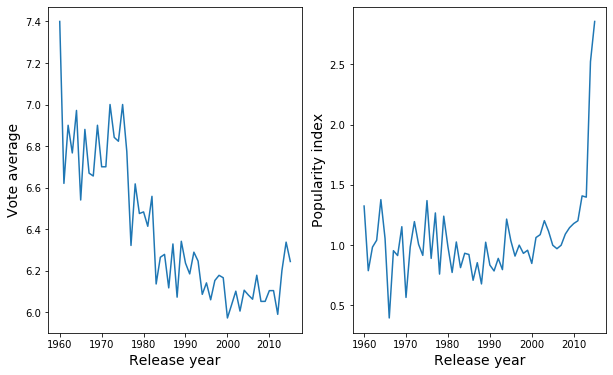

In [23]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
q1_1['vote_average'].plot()
plt.xlabel('Release year', fontsize=14)
plt.ylabel('Vote average', fontsize=14)
;
plt.subplot(1,2,2)
q1_1['popularity'].plot()
plt.xlabel('Release year', fontsize=14)
plt.ylabel('Popularity index', fontsize=14)
;

A different trend for both vote average and popularity is observed. it looks like the `vote average` of movies has been insteadily decreasing through the years, though popularity has remain more or less steady until 2010 when it has experimenting a notable increase. Movies are becoming on average more popular, even thougth their vote average is decreasing.

**1.2 Which are the most popular genres on average for the whole distribution? And what about these that have higher vote averages? Among those which have stand out in any particular moment of time, if any**

In order to perform the analysis of the most popular/higher-voted genres we have to do some operations again with the genres columns.

First, I create four staging dataframes, each one containing information about one of our genre columns (In the data wrangling phase I split our initial genres field in four fields) and the popularity and vote average for each of them. We'll use a groupby method for this purpose.

In [24]:
q1_1_genre1 = pd.DataFrame(movies.groupby(['release_year','genre1']).mean()[['popularity','vote_average']])
q1_1_genre2 = pd.DataFrame(movies.groupby(['release_year','genre2']).mean()[['popularity','vote_average']])
q1_1_genre3 = pd.DataFrame(movies.groupby(['release_year','genre3']).mean()[['popularity','vote_average']])
q1_1_genre4 = pd.DataFrame(movies.groupby(['release_year','genre4']).mean()[['popularity','vote_average']])

Using the concat method `same as a Union in SQL` I chain all of these 4 staging dataframes (all 4 have the same structure so there is no error doing that)

In [25]:
all_genres = pd.concat(objs=[q1_1_genre1,q1_1_genre2,q1_1_genre3,q1_1_genre4], keys=['genre1','genre2','genre3','genre4'])

After chaining the dataframe I reset the indexes and rename the columns so we can work with the definitive names of the columns from now on

In [26]:
all_genres.reset_index(inplace=True)
all_genres.columns = ['Genre_n','Year','Genre','Popularity','Vote_Average']

In [27]:
all_genres.head()

,Genre_n,Year,Genre,Popularity,Vote_Average
0,genre1,1960,Action,1.504538,6.95
1,genre1,1960,Comedy,0.501564,7.55
2,genre1,1960,Drama,2.610362,8.00
3,genre1,1961,Action,0.754548,7.00
4,genre1,1961,Adventure,2.631987,6.60


To find out which are the most popular genres I create a first groupby function with the only purpose to select the **TOP5 genres by overall popularity**. Since we are not still interested in the variation through the years, we will only use `Popularity` to get the overall mean.

In [28]:
all_genres_means = all_genres.groupby(['Genre']).mean()['Popularity'].sort_values(ascending=False)

In [29]:
all_genres_means

Genre
Adventure          1.754255
Animation          1.647187
Fantasy            1.606312
Science Fiction    1.541762
Action             1.495191
Family             1.420168
War                1.244264
Thriller           1.232701
Western            1.189551
Mystery            1.119390
Comedy             1.090972
Crime              1.042085
History            0.954685
Drama              0.951904
Romance            0.929311
Horror             0.879825
Music              0.856642
Documentary        0.294163
TV Movie           0.273628
Foreign            0.178311
Name: Popularity, dtype: float64

`Adventure, Action, Animation, Fantasy and Science Fiction` are overall on average the most popular genres of our distribution, so we will proceed from now on only with these five to simplify our analysis.

To check if the more popular genres are also the ones getting higher vote averages we will do the same genre ranking we just did but for the `vote_average` field

In [30]:
all_genres_means_pop = all_genres.groupby(['Genre']).mean()['Vote_Average'].sort_values(ascending=False)

In [31]:
all_genres_means_pop

Genre
Documentary        6.737037
War                6.580321
History            6.574799
Animation          6.494462
Drama              6.490818
Western            6.487500
Crime              6.380783
Music              6.333767
Adventure          6.281410
Mystery            6.250845
Romance            6.242546
Thriller           6.233498
Family             6.222976
Action             6.199770
Comedy             6.174962
Foreign            6.113636
Fantasy            6.106220
Science Fiction    6.093374
Horror             5.829813
TV Movie           5.600000
Name: Vote_Average, dtype: float64

From the most popular genres, only `animation` is located among the **TOP in vote average(4th place overall)**, `Adventure` is located around the half point of the series, and `Action, Fantasy and Science Fiction` are located in the bottom part of the series.
The conclusion up to this point is that there is no direct correlation between `popularity` and `vote_average`

Now that we have defined which are the TOP5 genres in terms of popularity, I create another groupby function, this is the one we will use to plot, so the `Year` field will be included. Using the `query` method to select only the data from the **TOP5 genres** we have identified before, in order to highlight that the variables are not correlated at all. I want to bring also the `documentary` genre into the plot so we can see the differences in vote_average among our TOP5 most popular genres and `Documentary`, which is the one that gets a higher `vote_average`

In [32]:
all_genres = all_genres.groupby(['Year','Genre']).mean()
top5_genres = all_genres.query("Genre in ('Adventure', 'Action', 'Animation', 'Fantasy','Science Fiction','Documentary')")

We then use the unstack method to transpose the indexes and bring the genres into columns. Doing this will allow us to easy plot them as different categories

In [33]:
top5_genres

Popularity  Vote_Average
Year Genre                                    
1960 Action             1.504538      6.950000
     Adventure          1.872132      7.000000
1961 Action             0.464139      6.550000
     Adventure          1.693268      6.800000
     Animation          2.631987      6.600000
...                          ...           ...
2015 Action             4.207662      6.180903
     Adventure          5.715702      6.342830
     Animation          2.765619      6.811111
     Fantasy            3.953553      6.350000
     Science Fiction    6.040500      6.487500

[256 rows x 2 columns]

By gradually unstacking from the deeper level we can tehn bring `Popularity` and `Vote_Average` into the row axis. Doing this it will be much helpful to perform operation at a column level, without having to query the multiindex directly

In [34]:
top5_genres = top5_genres.unstack(0)
top5_genres = top5_genres.unstack(1)
top5_genres = top5_genres.unstack(2)

In [35]:
top5_genres

Genre                Action  Adventure  Animation   Fantasy  Science Fiction  \
             Year                                                              
Popularity   1960  1.504538   1.872132        NaN       NaN              NaN   
             1961  0.464139   1.693268   2.631987       NaN              NaN   
             1962  1.848380   1.347908        NaN       NaN              NaN   
             1963  1.357698   1.586280        NaN       NaN              NaN   
             1964  3.153791   3.153791        NaN  1.987819              NaN   
...                     ...        ...        ...       ...              ...   
Vote_Average 2011  5.901541   6.135675   6.038889  6.147475         5.875000   
             2012  6.155952   6.384722   6.372917  6.275000         6.132292   
             2013  6.127232   6.585609   6.172222  6.441667         6.520417   
             2014  6.484136   6.543492   7.202500  6.490000         6.663889   
             2015  6.180903   6.342830   6.811111  6.350000         6.487500   

Genre              Documentary  
             Year               
Popularity   1960          NaN  
             1961          NaN  
             1962          NaN  
             1963          NaN  
             1964          NaN  
...                        ...  
Vote_Average 2011        6.525  
             2012        5.600  
             2013          NaN  
             2014          NaN  
             2015          NaN  

[112 rows x 6 columns]

Let's create two different dataframes one for each variable in our analysis `(Popularity and Vote Average)`

In [36]:
top5_genres_pop = top5_genres.loc['Popularity']

In [37]:
top5_genres_vote = top5_genres.loc['Vote_Average']

I finally create moving averages for each genre column for both dataframes, I will then drop the old ones as these are not useful anymore for our analysis.
**Moving averages for `Popularity`:**

In [38]:
top5_genres_pop['ActionMA'] = top5_genres_pop['Action'].rolling(window=5,min_periods=1).mean()
top5_genres_pop['AdventureMA'] = top5_genres_pop['Adventure'].rolling(window=5,min_periods=1).mean()
top5_genres_pop['FantasyMA'] = top5_genres_pop['Fantasy'].rolling(window=5,min_periods=1).mean()
top5_genres_pop['Science FictionMA'] = top5_genres_pop['Science Fiction'].rolling(window=5,min_periods=1).mean()
top5_genres_pop['AnimationMA'] = top5_genres_pop['Animation'].rolling(window=5,min_periods=1).mean()
top5_genres_pop['DocumentaryMA'] = top5_genres_pop['Documentary'].rolling(window=5,min_periods=1).mean()

**Moving averages for `Vote_Average`:**

In [39]:
top5_genres_vote['ActionMA'] = top5_genres_vote['Action'].rolling(window=5,min_periods=1).mean()
top5_genres_vote['AdventureMA'] = top5_genres_vote['Adventure'].rolling(window=5,min_periods=1).mean()
top5_genres_vote['FantasyMA'] = top5_genres_vote['Fantasy'].rolling(window=5,min_periods=1).mean()
top5_genres_vote['Science FictionMA'] = top5_genres_vote['Science Fiction'].rolling(window=5,min_periods=1).mean()
top5_genres_vote['AnimationMA'] = top5_genres_vote['Animation'].rolling(window=5,min_periods=1).mean()
top5_genres_vote['DocumentaryMA'] = top5_genres_vote['Documentary'].rolling(window=5,min_periods=1).mean()

Droping original columns and keeping the moving averages

In [40]:
top5_genres_pop.drop(['Action','Adventure','Fantasy','Science Fiction','Animation','Documentary'],axis=1, inplace=True)
top5_genres_vote.drop(['Action','Adventure','Fantasy','Science Fiction','Animation','Documentary'],axis=1, inplace=True)

In [41]:
top5_genres_pop.head()

Genre,ActionMA,AdventureMA,FantasyMA,Science FictionMA,AnimationMA,DocumentaryMA
Year,,,,,,
1960,1.504538,1.872132,NaN,NaN,NaN,NaN
1961,0.984339,1.782700,NaN,NaN,2.631987,NaN
1962,1.272352,1.637769,NaN,NaN,2.631987,NaN
1963,1.293689,1.624897,NaN,NaN,2.631987,NaN
1964,1.665709,1.930676,1.987819,NaN,2.631987,NaN


In [42]:
top5_genres_vote.head()

Genre,ActionMA,AdventureMA,FantasyMA,Science FictionMA,AnimationMA,DocumentaryMA
Year,,,,,,
1960,6.950000,7.000,NaN,NaN,NaN,NaN
1961,6.750000,6.900,NaN,NaN,6.6,NaN
1962,6.633333,6.800,NaN,NaN,6.6,NaN
1963,6.512500,6.875,NaN,NaN,6.6,NaN
1964,6.610000,6.900,7.2,NaN,6.6,NaN


Let's plot the TOP 5 genres by popularity (also including `Documentary`) and also plot these same genres by vote_average

''

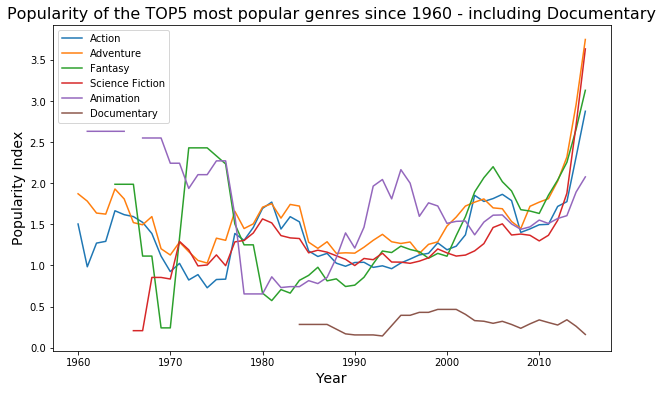

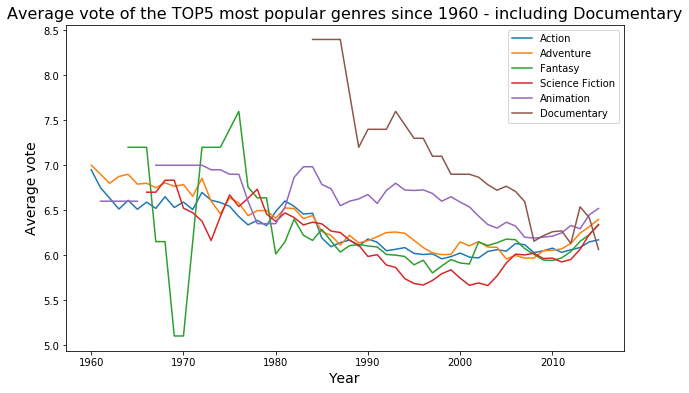

In [43]:
legend = ['Action','Adventure','Fantasy','Science Fiction','Animation','Documentary']

top5_genres_pop.plot(figsize=(10,6))
plt.legend(legend)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Popularity Index', fontsize=14)
plt.title('Popularity of the TOP5 most popular genres since 1960 - including Documentary', fontsize=16)
;

top5_genres_vote.plot(figsize=(10,6))
plt.legend(legend)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average vote', fontsize=14)
plt.title('Average vote of the TOP5 most popular genres since 1960 - including Documentary', fontsize=16)
;

When looking at the popularity chart we can already spot some peaks for particular genres that perhaps can be explained from certain movies or sagas that were very popular at that particular moment.
- `Science Fiction` peak at the late 70's, early 80's because of the original Star Wars trilogy
- `Animation` peak at the mid 90's mainly because of The Lion King and Toy Story 
- `Fantasy` peak at the early 00's because of The Lord of the Rings trilogy

To reinforce what we have already seen when looking at the series fo the most popular and higher vote_average for the TOP genres. There is no correlation at all between these two variables. The only genre that seems to be correlated is Animation.
`Documentary`genre is a great example because is the least popular genre, but at the same time is the on with higher vote_average through time, at a notable distance from our TOP5 most popular genres, even though its average_vote has been decreasing from 2010 and now it's at the same level that the other genres.

<a id='eda2'></a>
### Research Question 2
**1. Who are the directors that are getting higher profits for their movies? Are these directors among the ones with higher vote averages? Is there a correlation between these two variables?**

First I remove the movies with no value associated in the `director`column so that they don't compromise the analysis. I would also remove the values with no budget or revenue as they also affect the analysis.

In [44]:
movies[movies["director"] != 'No value']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,No value,Mike Nichols,You are cordially invited to George and Martha...,...,74,7.5,1966,5.038511e+07,2.266436e+08,Drama,None,None,None,None
3850,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,No value,Alfred Hitchcock,It tears you apart with suspense!,...,46,6.3,1966,2.015404e+07,8.733419e+07,Mystery,Thriller,None,None,None
3851,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,No value,Howard Hawks,It's the Big One with the Big Two,...,36,6.9,1966,3.125892e+07,4.030809e+07,Action,Western,None,None,None
3852,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,No value,Robert Wise,This is the heroic story of the men on the U.S...,...,28,7.0,1966,8.061618e+07,1.343603e+08,Action,Adventure,Drama,War,Romance


I create a groupby function in which I'll pass the new calculated columns we will need for our analysis. For that I will use the agg() method since this one allows me to select a different metric for every column I want to summarize

In [45]:
director = movies.groupby('director')

In [46]:
director = director.agg({'id':'count','budget_adj':'sum','revenue_adj':'sum', 'vote_average':'mean'})

I rename the columns of the new dataframe

In [47]:
columns = ['Movies', 'Total_Budget', 'Total_Revenue','Vote_Average']
director.columns = columns

director.head()

,Movies,Total_Budget,Total_Revenue,Vote_Average
director,,,,
FrÃ©dÃ©ric Jardin,1,2.423495e+06,3.255239e+03,5.9
A.R. Murugadoss,1,9.216358e+06,7.697178e+07,6.9
Aaron Blaise|Robert Walker,1,1.185353e+08,2.963382e+02,6.8
Aaron Norris,1,8.585801e+06,7.288926e+06,4.7
Aaron Seltzer|Jason Friedberg,1,2.163338e+07,5.251334e+07,3.9


Adding a new field `Total_Profit` to find out which is the director that is driving a higher total profit, regardless of the amount of movies produced

In [48]:
director['Total_Profit'] = director['Total_Revenue'] - director['Total_Budget']

Also adding another field `Avg_Profit` to find out who is the director that drives on average a higher average per movie

In [49]:
director['Avg_Profit'] = director['Total_Profit'] / director['Movies']

In [50]:
director.describe()

,Movies,Total_Budget,Total_Revenue,Vote_Average,Total_Profit,Avg_Profit
count,1714.000000,1.714000e+03,1.714000e+03,1714.000000,1.714000e+03,1.714000e+03
mean,2.248541,9.947546e+07,3.081956e+08,6.053428,2.087202e+08,6.797352e+07
std,2.424592,1.801152e+08,7.324405e+08,0.741948,5.837342e+08,1.414781e+08
min,1.000000,9.693980e-01,5.926763e+00,2.200000,-4.139124e+08,-4.139124e+08
25%,1.000000,1.174798e+07,1.516723e+07,5.600000,-6.996667e+05,-6.530638e+05
50%,1.000000,3.396151e+07,6.897598e+07,6.100000,3.131213e+07,2.061588e+07
75%,3.000000,1.076608e+08,2.950346e+08,6.500000,1.743225e+08,7.760156e+07
max,27.000000,2.076422e+09,1.520245e+10,8.200000,1.312603e+10,1.551568e+09


''

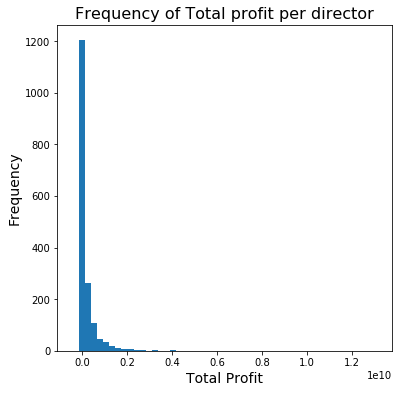

In [51]:
director['Total_Profit'].plot(kind='hist', bins=50, figsize=(6,6))
plt.xlabel('Total Profit', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of Total profit per director', fontsize=16)
;

Just to get an impression of the distribution of the total profit by director, when plotting it in a histogram I noticed that the majority of the directors are getting low profits, compared to some outlier directors that are getting much higher values.

''

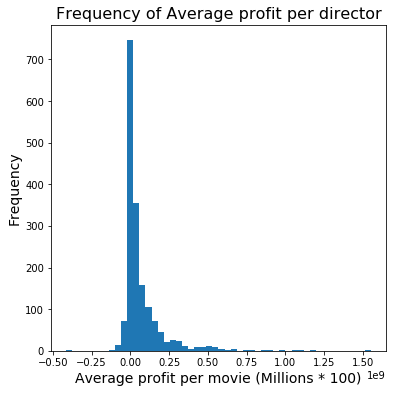

In [52]:
director['Avg_Profit'].plot(kind='hist', bins=50, figsize=(6,6))
plt.xlabel('Average profit per movie (Millions * 100)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of Average profit per director', fontsize=16)
;

When looking at the average profit per movie for every director, the distribution is a bit more expanded that in the previous histogram, with the majority of directors averaging between 0 and 20 millions profit per movie

Before plotting and extract conclusions let's ensure that the directors with a certain amount of movies are considered for this analysis, my goal here is to discard the ones that could have produced a single one very profitable movie but haven't really produce a good amount of movies. Using the describe method I can see that the mean of movies produces is just above 2 (2.24) so I have decided to select only the **directors that produced 4 movies or more**
Doing that I make sure to select directors with solid background and long trajectories.

In [53]:
director = director.query("Movies > 3")

In [54]:
director.sort_values('Avg_Profit', inplace=True, ascending=False)

Finally, since I want to focus on the top directors, I select the TOP 10 directors by `Avg_Profit`

In [55]:
director_top10 = director.head(10)

''

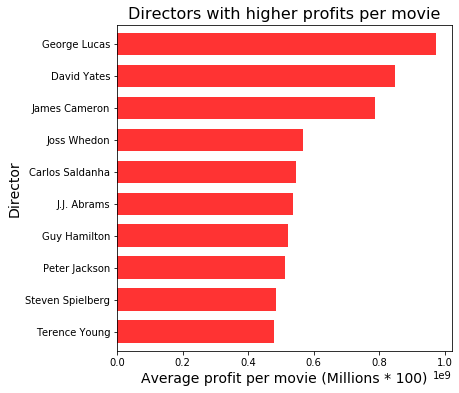

In [56]:
director_top10['Avg_Profit'].plot(kind='barh', figsize=(6,6), width=0.7, alpha=0.8, color='red')
plt.gca().invert_yaxis()
plt.xlabel('Average profit per movie (Millions * 100)', fontsize=14)
plt.ylabel('Director', fontsize=14)
plt.title('Directors with higher profits per movie', fontsize=16)
;

The TOP10 director for average profit per movie earn between 400 and 600 Milion dollars per movie. In the list we can see very well recognized directors, such as **JJ Abrams, James Cameron or Steven Spielberg**. The directors that drives higher averages of profit per movie are **David Yates** (director of several Harry Potter movies) and **George Lucas** (director of the original Star Wars saga)

Now that is clear which are the top profitable director of the dataframe, let's check if these directors show any correlation between having profitable movies and having high `vote_average`
To do that I will refer to the initial directors dataframe, which is the one that is selecting all directors from the dataframe and not only the most profitable

Fist I ensure that I only include directors with positive profit

In [57]:
director = director.query("Avg_Profit > 0")

I reset the index so it will be easier to plot

In [58]:
director.reset_index()

,director,Movies,Total_Budget,Total_Revenue,Vote_Average,Total_Profit,Avg_Profit
0,George Lucas,6,4.697600e+08,6.313919e+09,6.700000,5.844159e+09,9.740265e+08
1,David Yates,4,7.830252e+08,4.177455e+09,7.400000,3.394430e+09,8.486075e+08
2,James Cameron,8,1.030642e+09,7.327221e+09,7.100000,6.296578e+09,7.870723e+08
3,Joss Whedon,4,5.102922e+08,2.779224e+09,7.425000,2.268932e+09,5.672330e+08
4,Carlos Saldanha,4,3.601278e+08,2.546672e+09,6.450000,2.186544e+09,5.466361e+08
...,...,...,...,...,...,...,...
276,Neil LaBute,4,1.148290e+08,1.312250e+08,5.525000,1.639596e+07,4.098990e+06
277,Paul McGuigan,4,1.392616e+08,1.536169e+08,6.300000,1.435524e+07,3.588810e+06
278,Brian Robbins,6,2.857392e+08,3.041559e+08,5.266667,1.841676e+07,3.069460e+06
279,John Stockwell,4,1.258877e+08,1.337193e+08,5.750000,7.831653e+06,1.957913e+06


I proceed to plot the correlation of `Avg_Profit` and `Vote_Average` using seaborn scatter plot. This type of plot not only shows the correlation between the two variables, but also shows us the density of occurrences in a given coordinate. So the  parts of the charts with a darker blue means that more occurrences happen in that particular coordinate. Found this information [here](https://towardsdatascience.com/seaborn-0-11-just-released-with-great-new-features-c5b45efad7e2)

''

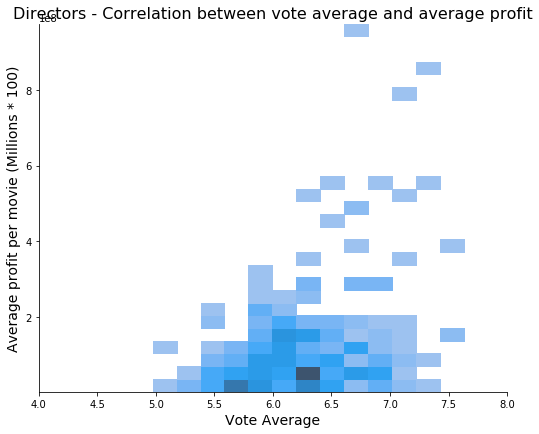

In [59]:
sns.displot(data=director, x='Vote_Average', y='Avg_Profit',kind='hist', height=6, aspect=1.2)
plt.xlabel('Vote Average', fontsize=14)
plt.ylabel('Average profit per movie (Millions * 100)', fontsize=14)
plt.title('Directors - Correlation between vote average and average profit', fontsize=16)
plt.xlim(4,8)
;

The correlation between these variables is very clear, our most profitable directors are located amongst the ones with higher vote_averages, all of them have a higher vote_average than the mean for all directors (6.05)

<a id='eda3'></a>
### Research Question 3
**1. Which are the movies that are most profitable? Is there a genre specially profitable?**

In this particular question,when I talk about profitable I refer to a movie getting a return in profit that is **x amount of times higher than its budget**. In this case I am not looking at highest total revenue but at the difference between total profit and initial budget.

To get the correct `Times Profit over Budget` column we first need to get id of the movies that have wrong budgets associated.
After running some analysis on the `budget` column I realised that there are some movies with obvious wrong budget records, most of them inferior to 100 dollars which can't be true, so I decided to set the minimum to `budget > 10000` otherwise these will get inf amount of `Times Profit over Budget`.
I am also including the genres of the movies to check there is a common genre among the most profitable.
I will call these movies, `outlier_movies`

In [60]:
movies_outliers = movies[['original_title','director','budget_adj','revenue_adj','genre1','genre2','genre3','genre4','genre5']]
movies_outliers.set_index('original_title', inplace=True)
movies_outliers = movies_outliers[movies_outliers['budget_adj'] > 10000]

Setting the index to the movie title and create the two new fields I need to perform this analysis:
- Profit (`Revenue - Budget`)
- Times Profit ove Budget (`Profit / Budget`)

In [61]:
movies_outliers['profit'] = movies_outliers['revenue_adj'] - movies_outliers['budget_adj']

In [62]:
movies_outliers['Times Profit over Budget'] = movies_outliers['profit'] / movies_outliers['budget_adj']

Just to get an overall perspective of our outlier movies I will use as a reference the mean of `Times Profit over Budget` across all of our dataset

In [63]:
movies_outliers['Times Profit over Budget'].describe()

count     3829.000000
mean        10.156476
std        263.633916
min         -1.000000
25%         -0.127814
50%          1.116839
75%          3.201912
max      12889.386667
Name: Times Profit over Budget, dtype: float64

The mean of `Times profit over Budget` is 10, so a movie returns a profit, in average 10 times its budget
Just looking at the main metrics that we extract from the describe method we can see that the data is extremely spread (we have a std of 263)

Just to visually see how extremely spread the data is I created a histogram 

''

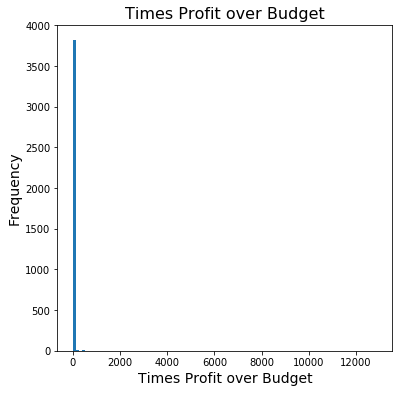

In [64]:
movies_outliers['Times Profit over Budget'].plot(kind='hist', bins=100, figsize=(6,6))
plt.xlabel('Times Profit over Budget', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Times Profit over Budget', fontsize=16)
;

Almost the entire dataset is concentrated in the first bin, with some very scattered point of data spread across the distribution

I proceed then to sort our dataset by `Times Profit over Budget` and return the top 10 values

In [65]:
movies_outliers_top10 = movies_outliers.sort_values('Times Profit over Budget', ascending=False).head(10)

Finally, I create a series with the results together with an horizontal bar chart. It is easy to spot the enormous differences between the mean value of the whole dataset and the most extreme values

In [66]:
movies_outliers_top10['Times Profit over Budget']

original_title
Paranormal Activity             12889.386667
The Blair Witch Project          9919.000000
Eraserhead                        699.000000
Pink Flamingos                    499.000000
Super Size Me                     438.616585
The Gallows                       425.644100
Open Water                        419.522723
The Texas Chain Saw Massacre      362.047059
Mad Max                           249.000000
Halloween                         232.333333
Name: Times Profit over Budget, dtype: float64

''

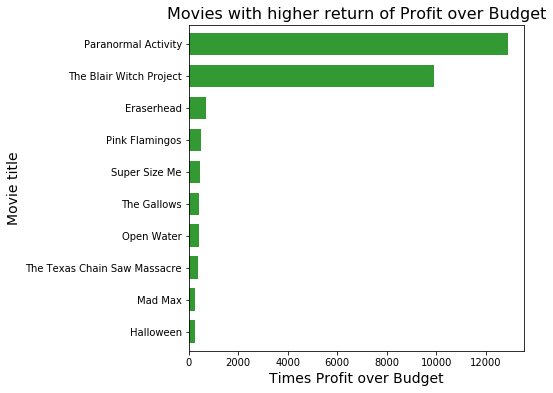

In [67]:
movies_outliers_top10['Times Profit over Budget'].plot(kind='barh', figsize=(6,6), width=0.7, alpha=0.8, color='green')
plt.gca().invert_yaxis()
plt.xlabel('Times Profit over Budget', fontsize=14)
plt.ylabel('Movie title', fontsize=14)
plt.title('Movies with higher return of Profit over Budget', fontsize=16)
;

Horror movies seem to be the ones that using smaller budgets are able to get higher times profit over budgert. 6 out of the 10 top movies are Horror genre.
Standing out is Paranormal Activity and The Blair Witch Project that got a profit more than 10k times its budget. The rest of the other movies are located around the 200 and 400.
Let's recreate the dataframe with some formatting just to highlight the Horror genre prevalence:

In [68]:
def highlight_genre(val):
    color = 'red' if val == 'Horror' else 'black'
    return 'color: %s' % color

r = movies_outliers_top10.style.applymap(highlight_genre)

r

,director,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5,profit,Times Profit over Budget
original_title,,,,,,,,,,
Paranormal Activity,Oren Peli,15775.028739,203346220.129588,Horror,Mystery,None,None,None,203330445.100848,12889.386667
The Blair Witch Project,Daniel Myrick|Eduardo SÃ¡nchez,32726.321165,324645105.955391,Horror,Mystery,None,None,None,324612379.634226,9919.000000
Eraserhead,David Lynch,35977.810326,25184467.227992,Science Fiction,Fantasy,Horror,Drama,None,25148489.417667,699.000000
Pink Flamingos,John Waters,62574.731176,31287365.588174,Comedy,None,None,None,None,31224790.856997,499.000000
Super Size Me,Morgan Spurlock,75038.950988,32988367.346373,Documentary,Comedy,Drama,None,None,32913328.395386,438.616585
The Gallows,Travis Cluff|Chris Lofing,91999.959520,39251239.929454,Horror,Thriller,None,None,None,39159239.969934,425.644100
Open Water,Chris Kentis,150077.901976,63111168.012442,Drama,Thriller,None,None,None,62961090.110467,419.522723
The Texas Chain Saw Massacre,Tobe Hooper,375894.130524,136467258.515660,Horror,Thriller,None,None,None,136091364.385136,362.047059
Mad Max,George Miller,1201821.601001,300455400.250159,Adventure,Action,Thriller,Science Fiction,None,299253578.649158,249.000000


<a id='eda4'></a>
### Research Question 4
**1. Which the main features that make a particular movie very profitable?**

For this question we will try to get positive correlations from scatter plots using the `revenue_adj variable`

In [69]:
movies_sum = movies[['original_title','runtime','popularity','vote_average','revenue_adj']]

In [70]:
movies_sum.set_index('original_title', inplace=True)

''

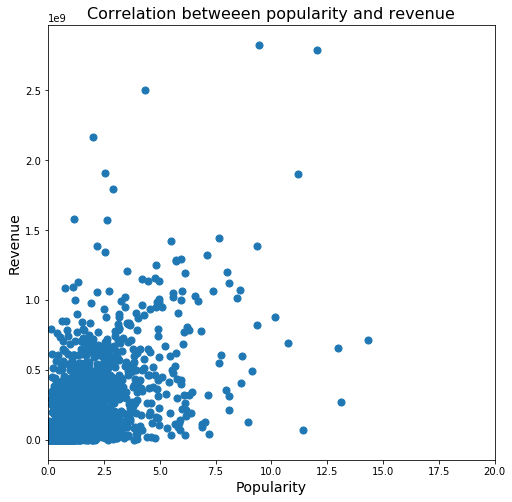

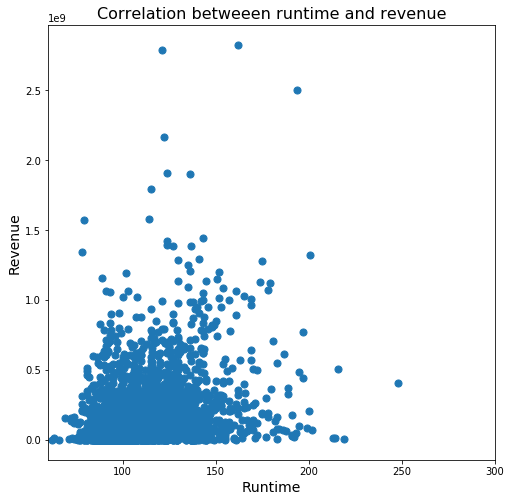

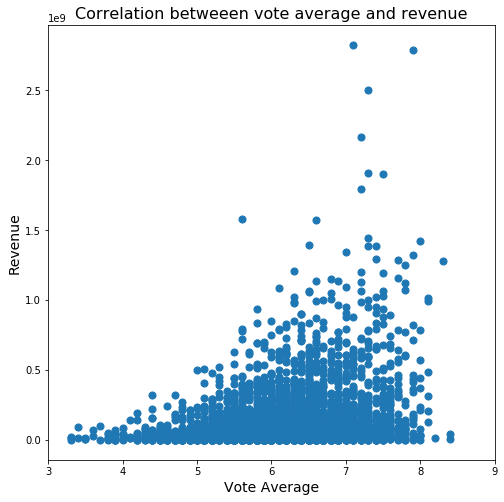

In [71]:
movies_sum.plot(kind='scatter', x='popularity', y='revenue_adj', s=50, figsize=(8,8))
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title('Correlation betweeen popularity and revenue', fontsize=16)
plt.xlim(0,20)
;

movies_sum.plot(kind='scatter', x='runtime', y='revenue_adj', s=50, figsize=(8,8))
plt.xlabel('Runtime', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title('Correlation betweeen runtime and revenue', fontsize=16)
plt.xlim(60,300)
;

movies_sum.plot(kind='scatter', x='vote_average', y='revenue_adj', s=50, figsize=(8,8))
plt.xlabel('Vote Average', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title('Correlation betweeen vote average and revenue', fontsize=16)
plt.xlim(3,9)
;

When analyzing movies individualy, I have focus on three different variables that could correlate with revenue. In this case I found that the popularity correlates very slightly (almost nothing) with revenue, so that the movies with higher revenue tend ot be slightly more popular than the ones with lower revenues.
I found that runtime correlates slightly more, as movies with higher durations tend to get higher revenues. But that is still not a clear positive correlation.
The variable that has a more clear positive correlation is vote_average, movies with higher vote averages tend 


<a id='conc'></a>
### Conclusions

#### Discussion about limitations

The dataset has been sufficient to prove my findings, all the variables that I wanted to check were present and even though I had to perform some manual operations in the data wrangling section I am happy with the overall result. The only field that I missed is one related to the movie's production country as this is the first question that came to my mind from this dataframe was to analyze the vote average of movies from both United States and the rest of the world, and then cross check this results with other variables such as revenue.
    
In terms of missing values I found the analysis quite compromised when I had to remove the null values for all movies that have values set to 0 in columns such as budget and revenue. By doing this the dataframe was cutted in half and I felt like my analysis was not entirely solid in any questions such as the analysis of the popularity of the TOP5 genres through time. A lot of gaps are observed in this chart and the moving averages look more 'sharply shaped' than expected due to the lack of data.

For the data to be presented in a cleaner way it would have been ideal to have in advance all 4 genre column instead of an unique column with all the genres separated by pipes.

#### Final results/conclusions

**1. No correlation between popularity and good vote averages**
At a first glance it looks like popularity and high voting for a movie are positively correlated variables to some extend but I found out that the most popular movies do not have to be the ones getting the most outstanding votes, specially when taking into account the most popular genres, such as `Fantasy, Adventures, Science Fiction` these genres even though being the most popular are located in the bottom part of the distribution when considering average voting

**2. Popularity of genres through time is tied to the popularity of certain movies/sagas**
When looking at the results for the most popular genres, there are some peaks in popularity that can be directly associated to certain movies and sagas. The one that caught my attention was the one for `animation` in the early 90's, directly associated to movies such as Lion King and Toy Story. A single or very few, very succesfull and popular movies can make the overall popularity of the genre pike for quite a long period of time.

**3. Horror movies are the most profitable ones**
When considering the `Times profit over Budget` metric (a movie getting a return in profit that is **x amount of times higher than its budget**), horror movies are the ones that appear in the firsts positions. The profile of this type of movie is independent movies with very low initial budget that gain a lot of popularity and returned a profit a lot of times higher that the budget. The most notorious examples are The Blair Witch Project and Paranormal Activity

**4. Most profitable directors are also among the highest rated**
When analyzing who are the most profitable directors, knowing in advance that these directors produce movies from genres not specially good rated in general (point 1 of this conclusions), I have assumed that profitability was not correlated with high vote averages, but is actually quite the contrary, all top directors in terms of profitability obtain vote averages higher than the mean for all directors